# Исследование активности пользователей Яндекс Афиши в осенний период 2024 года

Автор: Болохова Ирина

Дата: 26.08.2025

## Введение

Коллеги из продуктового отдела Яндекс Афиши отметили значительное изменение в поведении пользователей. Причины этого явления пока не ясны. Возможно, повлияла сезонность, и предпочтения аудитории изменились? Или же сама аудитория трансформировалась? Важно выяснить, какие мероприятия стали более популярными, а какие организаторы и площадки вышли в лидеры. Также необходимо понять, отличаются ли пользователи, бронирующие билеты через мобильные устройства, от тех, кто предпочитает делать это со стационарного компьютера.

### Цель:

Провести исследовательский анализ данных сервиса Яндекс Афиша для изучения динамики пользовательского поведения осенью 2024 года, основной акцент сделать на выявлении изменений в предпочтениях пользователей и популярности событий, а также проверить гипотезы о статистически значимых различиях в поведении пользователей мобильных и стационарных устройств.

### Задачи:

1. Загрузить данные и познакомиться с их содержимым:
    - вывести общую информацию о данных в каждом датасете;
    - оценить объём данных, их корректность и соответствие описанию;
    - предположить, какие шаги необходимо сделать на стадии предобработки данных.
2. Провести предобработку данных:
    - проверить данные на пропуски;
    - изучить значения в ключевых столбцах;
    - проверить данные на наличие дубликатов;
    - провести преобразование типов;
    - добавить необходимые для дальнейшей работы столбцы.
3. Провести исследовательский анализ данных:
     - изучить распределения заказов по сегментам и их сезонные изменения;
     - изучить активность пользователей осенью 2024 года;
     - определить популярные события и партнеров.
4. Провести статистический анализ данных:
     - проверить гипотезу о среднем количестве заказов;
     - проверить гипотезу о среднем времени между заказами.
5. Сформулировать выводы по проведённому анализу.

### Описание данных

В проекте будут использоваться данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 31 октября 2024 года.

Датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Датасет содержит слудующие поля:
   - `order_id` — уникальный идентификатор заказа.
   - `user_id` — уникальный идентификатор пользователя.
   - `created_dt_msk` — дата создания заказа (московское время).
   - `created_ts_msk` — дата и время создания заказа (московское время).
   - `event_id` — идентификатор мероприятия из таблицы events.
   - `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
   - `age_limit` — возрастное ограничение мероприятия.
   - `currency_code` — валюта оплаты, например rub для российских рублей.
   - `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
   - `revenue` — выручка от заказа.
   - `service_name` — название билетного оператора.
   - `tickets_count` — количество купленных билетов.
   - `total` — общая сумма заказа.
   - `days_since_prev` — количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.
   
Датасет `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит следуюшие поля:
   - `event_id` — уникальный идентификатор мероприятия.
   - `event_name` — название мероприятия. 
   - `event_type_description` — описание типа мероприятия.
   - `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
   - `organizers` — организаторы мероприятия.
   - `region_name` — название региона.
   - `city_name` — название города.
   - `venue_id` — уникальный идентификатор площадки.
   - `venue_name` — название площадки.
   - `venue_address` — адрес площадки.
   
Датасет `final_tickets_tenge_df.csv` содеержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит следующие поля:
   - `nominal` — номинал (100 тенге).
   - `data` — дата.
   - `curs` — курс тенге к рублю.
   - `cdx` — обозначение валюты (kzt).

### Содержимое проекта

1. Знакомство с данными.
2. Предобработка данных.
3. Проведение исследовательского анализа данных.
4. Проведение статистического анализа данных и проверка гипотез.
5. Итоговые выводы и рекомендации.

## 1. Знакомство с данными

Для начала загрузим все необходимые в проекте библиотеки.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize


Теперь загрузим данные.

In [2]:
# Загрузим датасет final_tickets_orders_df.csv в переменную tickets_orders_df
try:
    tickets_orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
except:
    tickets_orders_df = pd.read_csv('final_tickets_orders_df.csv')
    
# Загрузим датасет final_tickets_events_df.csv в переменную tickets_events_df
try:
    tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
except:
    tickets_events_df = pd.read_csv('final_tickets_events_df.csv')
    
# Загрузим датасет final_tickets_tenge_df.csv в переменную tickets_tenge_df
try:
    tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
except:
    tickets_tenge_df = pd.read_csv('final_tickets_tenge_df.csv')

Познакомимся с данными датасетов.

Начнем с датасета `tickets_orders_df`: выведем о них общую информацию и первые строки датасета.

In [3]:
# Выведем информацию о датасете tickets_orders_df
tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [4]:
# Выведем первые строки датасета tickets_orders_df
tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Датасет `tickets_orders_df` содержит 14 столбцов и 290849 строк.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object`, `int64` и `float64`. 
 - Значения в столбцах `created_dt_msk` и `created_ts_msk` показывают дату (и время) создания заказа, их тип данных следует привести к типу времени и даты. 
   Значения в остальных столбцах имеют верный тип данных.
 - Пропуски содержатся только в столбце `days_since_pre`, что объясняется данными в столбце - пропуски в нем возможны. 
 - Значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `tickets_events_df`: выведем о них общую информацию и первые строки датасета.

In [5]:
# Выведем информацию о датасете tickets_events_df
tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [6]:
# Выведем первые строки датасета tickets_events_df
tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Датасет `tickets_events_df` содержит 11 столбцов и 22427 строк.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object` и `int64`. 
 - Значения в столбцах имеют верный тип данных.
 - Пропуски в столбцах отсутствуют. 
 - Значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `tickets_tenge_df`: выведем о них общую информацию и первые строки датасета.

In [7]:
# Выведем информацию о датасете tickets_tenge_df
tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [8]:
# Выведем первые строки датасета tickets_tenge_df
tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Датасет `tickets_tenge_df` содержит 4 столбца и 357 строк.

После первичного анализа данных можно сделать следующие выводы:
 - Названия столбцов единого вида и не требуют переименования.
 - Представленные данные хранятся в типах данных `object`, `float64` и `int64`. 
 - Значения в столбцe `data` показывают дату, в которую существует определенных курс, его тип данных следует привести к типу времени и даты. Значения в остальных столбцах имеют верный тип данных.
 - Пропуски в столбцах отсутствуют. 
 - Значения в столбцах соответствуют своему описанию.

## 2. Предобработка данных

### 2.1 Объединение датасетов и работа с пропусками

Перед проведением предобработки данных объединим два основных датасета `tickets_orders_df` и `tickets_events_df` в единый датасет `tickets_df`, а затем проведем предобработку данных.

In [9]:
# Объединим таблицы в одну
tickets_df = tickets_orders_df.merge(tickets_events_df, on='event_id', how='left')
display(tickets_df) 

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,74883818-57a6-494a-b162-bb0260877cbf,спектакль,театр,№4837,Каменевский регион,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68"
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,6f4c6a50-0106-407b-8f54-332c740b01da,шоу,стендап,№998,Широковская область,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4"


In [10]:
# Выведем информацию о полученном датасете
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

В полученной объединенной таблице `tickets_df` получилось 24 столбца и 290611 строки.
Пропуски в данных присутствуют в столбце `days_since_prev`, что объясняется самими данными, а также во всех столбцах из таблицы с событиями. Посчитаем их количество.

In [11]:
# Посчитаем количество пропусков в столбце days_since_prev
tickets_df['days_since_prev'].isna().sum()

21940

In [12]:
# Посчитаепм долю пропусков в столбце days_since_prev 
round(100 * tickets_df['days_since_prev'].isna().mean(), 1)

7.5

In [13]:
# Посчитаем количество пропусков в столбце event_name
tickets_df['event_name'].isna().sum()

238

In [14]:
# Посчитаепм долю пропусков в столбце event_name 
round(100 * tickets_df['event_name'].isna().mean(), 2)

0.08

По полученным результатам видим, что доля пропусков в столбце `days_since_prev` составлявляет **7.5%** от общего количества строк, а доля пропусков в части таблицы про события на примере столбца `event_name` (т.к. количество пропусков в них одинаково) составляет **менее 1%** от общего количества данных.

Так как столбец `days_since_prev` по своей сути может содержать пропуски, удалять их не будем.

А пропуски в столбцах `event_name`, `event_type_description`, `event_type_main`, `organizers`, `region_name`, `city_name`, `city_id`, `venue_id`, `venue_name` и `venue_address` удалим, так как их доля относительно общего количества данных мала.

In [15]:
# Удалим пропуски в столбцах event_name, event_type_description, event_type_main, 
# organizers, region_name, city_name, city_id, venue_id, venue_name и venue_address
tickets_df_clean = tickets_df.dropna(subset = ['event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name',
                                         'city_name', 'city_id', 'venue_id', 'venue_name', 'venue_address'])
tickets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

Пропуски удалили.

### 2.2 Работа с дубликатами

Теперь проверим данные на явные и неявные дубликаты.

In [16]:
# Проверим датасет на явные дубликаты
tickets_df_clean.duplicated().sum()

0

Явные дубликаты отсутствуют.

Проверим данные на наличие неявных дубликатов. Проверим по столбцам `user_id`, `created_ts_msk`, `device_type_canonical`,  `service_name`, `event_id`, `revenue`, `total`, `event_id`.

In [17]:
# Проверим данные на неявные дубликаты
tickets_df_clean.duplicated(subset = ['user_id', 'created_ts_msk', 'device_type_canonical', 
                                'service_name', 'event_id', 'revenue', 'total', 'event_id']).sum()

42

In [18]:
# Посчитаем долю таких дубликатов
round(100 * tickets_df_clean.duplicated(subset = ['user_id', 'created_ts_msk', 'device_type_canonical', 
                                'service_name', 'event_id', 'revenue', 'total', 'event_id']).mean(), 3)

0.014

В данных содержатся 42 неявных дубликата, что составляет **0.014%** от общего количества данных. 

Посмотрим, что это за данные.

In [19]:
# Выведем получившиеся дубликаты
print(tickets_df_clean[tickets_df_clean.duplicated(subset = ['user_id', 'created_ts_msk', 'device_type_canonical', 
                                'service_name', 'event_id', 'revenue', 'total', 'event_id'], keep=False)])

        order_id          user_id created_dt_msk       created_ts_msk  \
11777    1123983  06eb7897f65b433     2024-08-13  2024-08-13 16:31:07   
11778    1123867  06eb7897f65b433     2024-08-13  2024-08-13 16:31:07   
26894    1930705  0dc525d7bacbb0d     2024-07-31  2024-07-31 13:26:11   
26896    1930763  0dc525d7bacbb0d     2024-07-31  2024-07-31 13:26:11   
53715    1935113  206ea45ec11d478     2024-10-29  2024-10-29 16:46:54   
...          ...              ...            ...                  ...   
285615   8548012  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:56   
285617   8548041  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:50   
285618   8548070  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:50   
285619   8548099  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:56   
285622   8547867  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:56   

        event_id cinema_circuit  age_limit currency_code  \
11777     183706            нет         18           rub   
117

По полученным данным видим, что дубликаты по перечисленным полям идентичны, отличаются только номером заказа. Так как нельзя создать 2 заказа в одно и тоже время, будем считать их ошибкой в данных и удалим.

In [20]:
# Удалим найденные дубликаты
tickets_df_clean = tickets_df_clean.drop_duplicates(subset = ['user_id', 'created_ts_msk', 'device_type_canonical', 
                                'service_name', 'event_id', 'revenue', 'total', 'event_id'])
tickets_df_clean.duplicated(subset = ['user_id', 'created_ts_msk', 'device_type_canonical', 
                                'service_name', 'event_id', 'revenue', 'total', 'event_id']).sum()

0

Данные очистили от дубликатов.

### 2.3 Преобразование типов данных

Теперь преобразуем тип данных для столбцов, содержащих дату и время, во временной.

In [21]:
# Преобразуем тип данных столбца created_dt_msk
tickets_df_clean['created_dt_msk'] = pd.to_datetime(tickets_df_clean['created_dt_msk'])

In [22]:
# Преобразуем тип данных столбца created_ts_msk
tickets_df_clean['created_ts_msk'] = pd.to_datetime(tickets_df_clean['created_ts_msk'])
tickets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290569 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290569 non-null  int64         
 1   user_id                 290569 non-null  object        
 2   created_dt_msk          290569 non-null  datetime64[ns]
 3   created_ts_msk          290569 non-null  datetime64[ns]
 4   event_id                290569 non-null  int64         
 5   cinema_circuit          290569 non-null  object        
 6   age_limit               290569 non-null  int64         
 7   currency_code           290569 non-null  object        
 8   device_type_canonical   290569 non-null  object        
 9   revenue                 290569 non-null  float64       
 10  service_name            290569 non-null  object        
 11  tickets_count           290569 non-null  int64         
 12  total                   290569

In [23]:
# Преобразуем тип данных столбца data в таблице tickets_tenge_df
tickets_tenge_df['data'] = pd.to_datetime(tickets_tenge_df['data'])
tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


Типы данных преобразованы.

### 2.4 Изучение категориальных данных

Изучим категориальные значения в столбцах.

In [24]:
# Рассмотрим, какие категории присутствуют в столбце cinema_circuit
tickets_df_clean['cinema_circuit'].unique()

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [25]:
# Рассмотрим, какие категории присутствуют в столбце age_limit
tickets_df_clean['age_limit'].unique()

array([16,  0, 18, 12,  6])

In [26]:
# Рассмотрим, какие категории присутствуют в столбце currency_code
tickets_df_clean['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [27]:
# Рассмотрим, какие категории присутствуют в столбце device_type_canonical
tickets_df_clean['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [28]:
# Рассмотрим, какие категории присутствуют в столбце service_name
tickets_df_clean['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [29]:
# Рассмотрим, какие категории присутствуют в столбце event_type_description
tickets_df_clean['event_type_description'].unique()

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

In [30]:
# Рассмотрим, какие категории присутствуют в столбце event_type_main
tickets_df_clean['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт',
       'ёлки'], dtype=object)

In [31]:
# Рассмотрим, какие категории присутствуют в столбце region_name
tickets_df_clean['region_name'].unique()

array(['Каменевский регион', 'Североярская область', 'Озернинский край',
       'Лугоградская область', 'Поленовский край', 'Широковская область',
       'Медовская область', 'Златопольский округ', 'Малиновоярский округ',
       'Яблоневская область', 'Ветренский регион', 'Боровлянский край',
       'Крутоводская область', 'Ягодиновская область',
       'Серебряноярский округ', 'Лесодальний край', 'Верхоречная область',
       'Горицветская область', 'Речиновская область', 'Травиницкий округ',
       'Сосновская область', 'Серебринская область', 'Травяная область',
       'Каменноярский край', 'Солнечноземская область',
       'Светополянский округ', 'Заречная область', 'Ручейковский край',
       'Глиногорская область', 'Тепляковская область',
       'Каменноозёрный край', 'Солнечнореченская область',
       'Зоринский регион', 'Берёзовская область', 'Лесостепной край',
       'Малиновая область', 'Синегорский регион', 'Луговая область',
       'Шанырский регион', 'Каменополянский окр

In [32]:
# Рассмотрим, какие категории присутствуют в столбце city_name
tickets_df_clean['city_name'].unique()

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Радужсвет', 'Кумсай',
       'Верховино', 'Светополье', 'Кокжар', 'Каменский', 'Лесоярич',
       'Никольянов', 'Речинцево', 'Лесозолотск', 'Дальнозерск',
       'Серебрянка', 'Островецк', 'Родниковец', 'Дальнесветск',
       'Луговаярово', 'Ягодиновка', 'Дальнополин', 'Солчелуг', 'Озёрчане',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Златопольск',
       'Крутовинск', 'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк',
       'Жаркентай', 'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск',
       'Радужанов', 'Глиногорь', 'Каменосветск', 'Родниковск',
       'Травогород', 'Глинянск', 'Радужинск', 'Поляногорье',
       'Дальнолесье', 'Ручейник', 'Ключеград', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Шаныртау', 'Дальнесоснов'

In [33]:
# Рассмотрим, какие категории присутствуют в столбце venue_name
tickets_df_clean['venue_name'].unique()

array(['Сценический центр "Деталь" Групп',
       'Музыкальная школа для детей "Аккаунт" Лтд',
       'Училище искусств "Нирвана" Инк', ...,
       'Университет искусств "Прогресс" Групп',
       'Творческая ярмарка "График" Инк', 'Школа музыки "Парадигма" Лтд'],
      dtype=object)

Изучив полученные значения, можно сказать, что в данных отсутствуют возможные неявные дубликаты из-зи написания, однако присутствует несколько значений, которые можно принять за пропуски:
   - в столбце `cinema_circuit` значение **'нет'**;
   - в столбце `age_limit` значение **'0'**.
   
Однако эти значения не являются пропусками, т.к. несут свою смысловую нагрузку.

### 2.5 Изучение количественных данных

Теперь изучим количественные данные датасета `tickets_df_clean`.
Для этого изучим статистические параметры и распределение на наличие выбросов наиболее важные столбцы: `revenue` и `tickets_count` в разрезе разных валют. 

In [34]:
# Отберем данные для валюты в руб.
tickets_rub = tickets_df_clean[(tickets_df_clean['currency_code'] == 'rub')]
# Отберем данные для валюты в тенге
tickets_kzt = tickets_df_clean[(tickets_df_clean['currency_code'] == 'kzt')]

# Изучим статистические данные столбца revenue в руб.
tickets_rub['revenue'].describe()

count    285501.000000
mean        548.030210
std         871.781464
min         -90.760000
25%         114.220000
50%         346.700000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

По полученным статистическим показателям можно заметить, что данные о выручке с заказа в рублях имеют асимметричное распределение, смещенное вправо из-за наличия выбросов, поскольку среднее значение больше медианы **(548.03 > 346.7)**. Стандартное отклонение составляет **871.78** и почти в 2 раза превышает среднее значение **548.03**, что указывает на большой разброс данных. В данных присутствуют отрицательные значения **(min = -90.76)** - возможной причиной могут быть возвраты средств или ошибки в данных. Большинство значений небольшие: **75% всех значений ≤ 793.32**, но есть редкие очень крупные операции **(max = 81,174.54)**.

Дополнительно проверим это и построим гистограмму распределения выручки с заказов в рублях, для большей информативности построим гистограмму в логарифмической шкале.

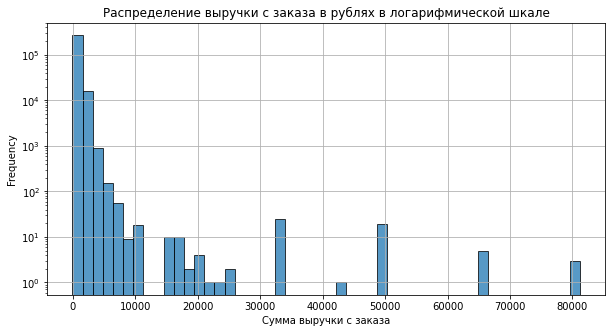

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
tickets_rub['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                logy=True
)

# Настраиваем оформление графика
plt.title('Распределение выручки с заказа в рублях в логарифмической шкале')
plt.xlabel('Сумма выручки с заказа')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Полученная гистограмма подтверждает статистические данные о том, что большинство значений небольшие, однако присутствуют несколько выбросов с большими значениями выручки.

In [36]:
# Изучим статистические данные столбца revenue в тенге
tickets_kzt['revenue'].describe()

count     5068.000000
mean      4995.827484
std       4917.039292
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

По полученным статистическим показателям можно заметить, что данные о выручке с заказа в тенге имеют асимметричное распределение, смещенное вправо из-за наличия выбросов, поскольку среднее значение больше медианы **(4,996 > 3,699)**. Стандартное отклонение составляет **4,917** и почти равно среднему значению **4,996**, что указывает на очень неравномерное распределение данных: есть как мелкие, так и очень крупные заказы. Большинство значений небольшие: **50% заказов приносят меньше 3,700 тенге**, но есть редкие крупные заказы **(max = 26,425)**.

Дополнительно проверим это и построим гистограмму распределения выручки с заказов в тенге.

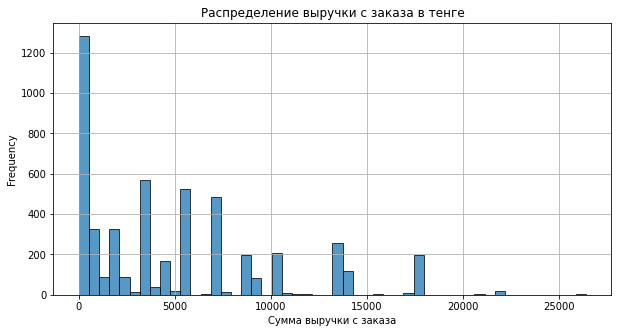

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
tickets_kzt['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0 # Градус вращения подписи по оси Х
                #logy=True
)

# Настраиваем оформление графика
plt.title('Распределение выручки с заказа в тенге')
plt.xlabel('Сумма выручки с заказа')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Полученная гистограмма подтверждает статистические данные о том, что большинство значений небольшие и данные распределены неравномерно, однако присутствуют несколько выбросов с большими значениями выручки.

Так как для обоих валют имеются выбросы с высокими значениями выручки с заказа, отфильтруем каждый из валютных датасетов по 99-му процентилю.

In [38]:
# Вычисляем 99-й процентиль для колонки revenue датасет tickets_rub
percentile_99 = tickets_rub['revenue'].quantile(0.99)
print(f"99-й процентиль для revenue: {percentile_99:.2f}")

# Фильтруем данные - оставляем только значения ≤ 99-го процентиля
tickets_rub = tickets_rub[tickets_rub['revenue'] <= percentile_99]
len(tickets_rub)

99-й процентиль для revenue: 2570.80


282702

In [39]:
# Вычисляем 99-й процентиль для колонки revenue датасет tickets_kzt
percentile_99 = tickets_kzt['revenue'].quantile(0.99)
print(f"99-й процентиль для revenue: {percentile_99:.2f}")

# Фильтруем данные - оставляем только значения ≤ 99-го процентиля
tickets_kzt = tickets_kzt[tickets_kzt['revenue'] <= percentile_99]
len(tickets_kzt)

99-й процентиль для revenue: 17617.24


5039

In [40]:
# Соедим полцченные датасеты
tickets_df_clean = pd.concat([tickets_rub, tickets_kzt], ignore_index=True)
display(tickets_df_clean)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287736,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
287737,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
287738,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
287739,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


Данные по 99-му процентилю отфильтрованы и объеденены в единый датасет.

Теперь изучим статистические данные о количестве билетов в заказе по столбцу `tickets_count`, также в разрезе валют.

In [41]:
# Изучим статистические данные столбца tickets_count в руб.
tickets_rub['tickets_count'].describe()

count    282702.000000
mean          2.740069
std           1.163514
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

По полученным статистическим данным можно сделать следующие выводы:
   - распределение близко к нормальному, так как **медиана (3) ≈ Среднему (2.75)**
   - стандартное отклонение **1.17** показывает, что данные достаточно сконцентрированы вокруг среднего
   - 50% заказов содержат 2-3 билета
   - в данных присутствует явный выброс - максимальное значение **57 билетов**
   
Дополнительно построим гистограмму в логарифмической шкале.

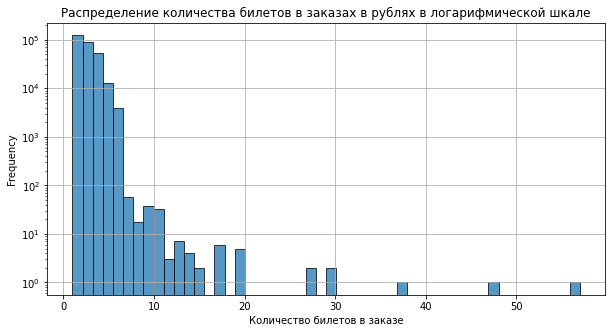

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
tickets_rub['tickets_count'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                logy=True
)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в заказах в рублях в логарифмической шкале')
plt.xlabel('Количество билетов в заказе')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По гистограмме видим, что большая часть заказов содержит **менее 10 билетов**, часть заказов содержит до 15 билетов в заказе, но присутствуют **несколько выбросов со значениями около 30, 38, 48 и 57 билетами в заказе**. Вероятно это были заказы для больших экскурсионных групп или для проведения корпоративных мероприятий.

In [43]:
# Изучим статистические данные столбца tickets_count в тенге.
tickets_kzt['tickets_count'].describe()

count    5039.000000
mean        2.748760
std         1.101618
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: tickets_count, dtype: float64

По полученным статистическим данным можно сделать следующие выводы:
   - распределение симметричное: **медиана (3) близка к среднему (2.75)**;
   - низкая вариативность: **стандартное отклонение всего 1.1**;
   - отсутствие выбросов (**максимальное значение: 6 билетов**).
   
Для лучшего восприятия построим гистограмму.

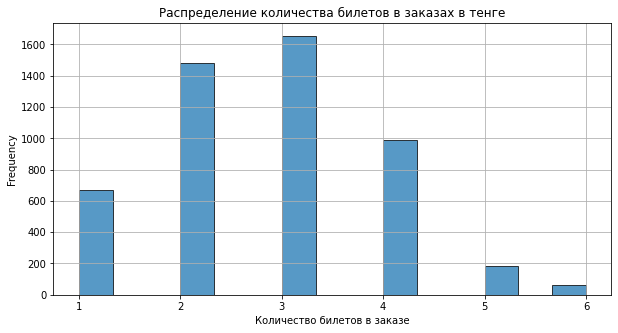

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму 
tickets_kzt['tickets_count'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=15, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0 # Градус вращения подписи по оси Х
                #logy=True
)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в заказах в тенге')
plt.xlabel('Количество билетов в заказе')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В общем по итогам статистического анализа значений выручки за заказ и количества билетов в заказе в разрезе валют можно сдедать следующие выводы:
   - и в России, и в Казахстане распределение выручки **асимметричное**, имеет **основной пик в области небольших значений** выручки, а также **присутствуют выбросы** - заказы с большими значениями выручки. Но в Казахстане данные имеют только один четко выраженный пик в начале распределения
   - распределение количества билетов **в Казахстане имеет нормальное распределение**, в отличие от распределения количества билетов **в России, где присутствуют выбросы с большим количеством билетов в заказе**.

### 2.6 Создание новых столбцов

Перед тем, как создавать новые столбцы, к исследуемому датасету `tickets_df_clean` присоединим датасет `tickets_tenge_df`.

In [45]:
# Присоединим датасет tickets_tenge_df
tickets_df_new = tickets_df_clean.merge(tickets_tenge_df, left_on = 'created_dt_msk', right_on = 'data', how = 'left')
tickets_df_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


In [46]:
# Создадим столбец revenue_rub, содержащий выручку с заказа в единой валюте — российском рубле
tickets_df_new['revenue_rub'] = tickets_df_new.apply(
    lambda row: (row['revenue'] * row['curs'])/row['nominal'] if row['currency_code'] == 'kzt' else 
               row['revenue'] if row['currency_code'] == 'rub' else 
               None,  
    axis=1
)
tickets_df_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41


In [47]:
# Создадим столбец one_ticket_revenue_rub, содержащий значение выручки с продажи одного билета на мероприятие
tickets_df_new['one_ticket_revenue_rub'] = tickets_df_new['revenue_rub'] / tickets_df_new['tickets_count']
tickets_df_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.4850
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.7250
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.6425
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.2450
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.4700


In [48]:
# Создадим новый столбец month, содержащий месяц даты создания заказа
tickets_df_new['month'] = tickets_df_new['created_dt_msk'].dt.month
tickets_df_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.4850,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.7250,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.6425,10
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.2450,7
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.4700,10


In [49]:
# Создадим новый столбец season, содержащий данные о сезонности
tickets_df_new['season'] = tickets_df_new.apply(
    lambda row: 'зима' if row['month'] in [12, 1, 2] else 
                'весна' if row['month'] in [3, 4, 5] else 
                'лето' if row['month'] in [6, 7, 8] else
                'осень' if row['month'] in [9, 10, 11] else
               None,  
    axis=1
)
tickets_df_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.4700,10,осень


In [50]:
# Получим итоговую информацию о полученном датасете
tickets_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287741 entries, 0 to 287740
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287741 non-null  int64         
 1   user_id                 287741 non-null  object        
 2   created_dt_msk          287741 non-null  datetime64[ns]
 3   created_ts_msk          287741 non-null  datetime64[ns]
 4   event_id                287741 non-null  int64         
 5   cinema_circuit          287741 non-null  object        
 6   age_limit               287741 non-null  int64         
 7   currency_code           287741 non-null  object        
 8   device_type_canonical   287741 non-null  object        
 9   revenue                 287741 non-null  float64       
 10  service_name            287741 non-null  object        
 11  tickets_count           287741 non-null  int64         
 12  total                   287741

In [51]:
#Посчитаем количество удаленных строк в результате предобработки данных
deleted_rows = len(tickets_df) - len(tickets_df_new)
deleted_rows_percent = round(deleted_rows / len(tickets_df) * 100)
print(f'Всего удалено {deleted_rows} строк, что составляет {deleted_rows_percent}% данных.')

Всего удалено 3108 строк, что составляет 1% данных.


### Промежуточные выводы

В процессе предобработки данных были выполнены следующие этапы:

 - Объеденены начальные датасеты  и получен итоговый датасет `tickets_df_new` с **287665** строками и **32** столбцами.
 - Найдены и удалены неявные дубликаты и часть пропусков.
 - Данные, отображающие дату и время, были приведены к соответствующему типу.
 - Исследованы количественные данные столбцов `revenue` и `tickets_count` - распределение данных о величине выручки за заказ имеет асимметричное распределение и выбросы в области высоких значений выручки, а данные по количеству билетов в заказе имеет разные распределения в России и Казахстане (в России - асимметричное с выбросами (более 30 билетов в заказе), в Казахстане - симметричное распределение).
 - Были созданы новые столбцы, содержащие данные для дальгейшего анализа.
 - Всего в результате предобработки данных было удалено **3108 строк**, что составляет **1%** от превоначального количества.

## 3. Проведение исследовательского анализа данных.

### 3.1 Анализ распределения заказов по сегментам и их сезонные изменения

Изучим изменение пользовательской активности или пользовательского интереса в связи с сезонностью и проанализируем динамику по таким разрезам:
   - тип мероприятия `event_type_main`;
   - тип устройства `device_type_canonical`;
   - категория мероприятий по возрастному рейтингу `age_limit`.

In [52]:
# Сгруппируем данные по месяцам и посмотрим на распределение количества заказов
group_month = tickets_df_new['month'].value_counts().sort_values()
display(group_month)

6     34163
7     40405
8     44547
9     69350
10    99276
Name: month, dtype: int64

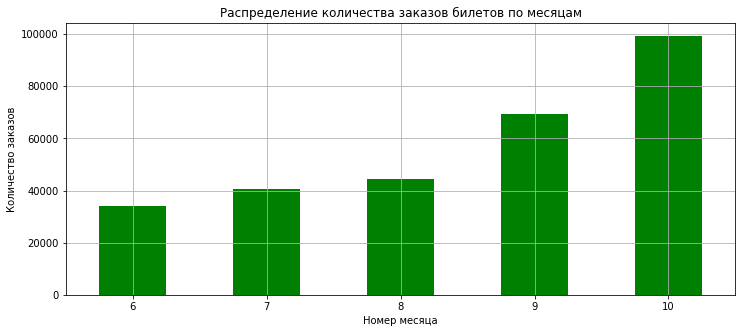

In [53]:
# Визуализируем полученные данные с помощью столбцатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_month.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заказов билетов по месяцам',
               color='green' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('Номер месяца')
plt.ylabel('Количество заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученной диаграмме видим, что в течение всего наблюдаемого периода с июня по октябрь количество заказов **растет**, и в октябре количесто заказов примерно **в 3 раза больше**, чем в июне.

Рассмотрим теперь динамику количества заказов в разрезе разных категорий.

In [54]:
# Рассмотрим динамику количества заказов в разрезе разных типов устройств
group_device = tickets_df_new.groupby('season')['device_type_canonical'].value_counts(normalize=True).unstack(fill_value=0)
display(group_device)

device_type_canonical,desktop,mobile
season,,
лето,0.193586,0.806414
осень,0.203427,0.796573


<Figure size 864x360 with 0 Axes>

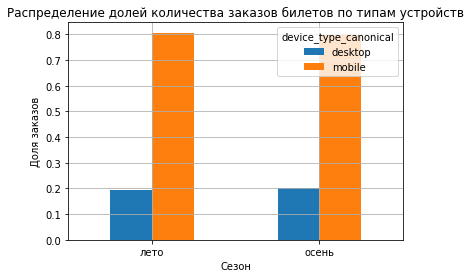

In [55]:
# Визуализируем полученные данные с помощью столбцатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_device.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=True, # Выключаем легенду
               title=f'Распределение долей количества заказов билетов по типам устройств'
)

# Настраиваем оформление графика
plt.xlabel('Сезон')
plt.ylabel('Доля заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученным числовым данным и диаграмме можно заметить, что доля заказов с различных питов устройств в летнее и осеннее время практически не отличается - разница составляет **1%**: летом выше доля заказов с мобильных устройств, а осенью - со стационарных.                          

In [56]:
# Рассмотрим динамику количества заказов в разрезе разных типов мероприятий
group_event_type = tickets_df_new.groupby('season')['event_type_main'].value_counts(normalize=True).unstack(fill_value=0)
#group_event_type = tickets_df_new.groupby(['season', 'event_type_main'])['order_id'].count().reset_index()
display(group_event_type)

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки
season,,,,,,,
лето,0.020283,0.271712,0.426193,0.025236,0.053276,0.201007,0.002292
осень,0.014446,0.197034,0.372048,0.111970,0.041055,0.253419,0.010028


In [57]:
# Транспонируем датасет
group_event_type_transposed = group_event_type.T
display(group_event_type_transposed)

season,лето,осень
event_type_main,,
выставки,0.020283,0.014446
другое,0.271712,0.197034
концерты,0.426193,0.372048
спорт,0.025236,0.111970
стендап,0.053276,0.041055
театр,0.201007,0.253419
ёлки,0.002292,0.010028


<Figure size 1008x504 with 0 Axes>

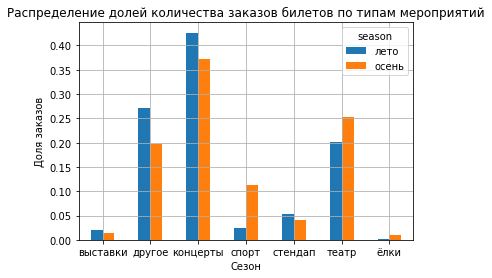

In [58]:
# Визуализируем полученные данные с помощью столбцатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_event_type_transposed.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               #x='event_type_main',
               rot=0, # Градус вращения подписи по оси Х
               legend=True, # Выключаем легенду
               title=f'Распределение долей количества заказов билетов по типам мероприятий'
)


# Настраиваем оформление графика
plt.xlabel('Сезон')
plt.ylabel('Доля заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученной диаграмме и числовым данным можно заметить, что на часть мероприятий доля заказов выросла (спорт, театр, ёлки), а на часть мероприятий уменьшилась (концерты, стендап, выставки):
   - в оба сезона лидируют продажи билетов на `концерты`, но летом доля концертов **выше на 5.4%**;
   - доля заказов билетов на `елки` в оба сезона минимальна, но осенью доля **увеличилась на 0.8%**
   - доля заказов билетов в `театр` осенью **увеличилась на 5.2%**;
   - доля заказов на `спортивные мероприятия` осенью **увеличилась на 8.7%**;
   - доля заказов билетов на `стендап` осенью **уменьшилась на 1.2%**;
   - доля заказов билетов на `выставки` осенью **уменьшилась на 0.6%**.
   
Данные изменения можно объяснить тем, что в летнее время проводится большое количество фестивалей, а во многих театрах каникулы, осенью же возвращаются театры, ближе к зиме появляется больше билетов на различные новогодние мероприятия. 
   

In [59]:
# Рассмотрим динамику количества заказов в разрезе категорий мероприятий по возрастному рейтингу
group_age = tickets_df_new.groupby('season')['age_limit'].value_counts(normalize=True).unstack(fill_value=0)
group_age_transposed = group_age.T
display(group_age_transposed)

season,лето,осень
age_limit,,
0,0.179675,0.236191
6,0.181950,0.176242
12,0.205381,0.220974
16,0.283373,0.262207
18,0.149620,0.104385


<Figure size 864x360 with 0 Axes>

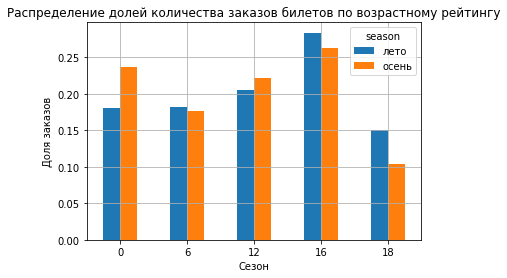

In [60]:
# Визуализируем полученные данные с помощью столбцатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_age_transposed.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=True, # Выключаем легенду
               title=f'Распределение долей количества заказов билетов по возрастному рейтингу'
)

# Настраиваем оформление графика
plt.xlabel('Сезон')
plt.ylabel('Доля заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученной диаграмме и числовым данным можно увидеть, что доля заказов на мероприятия возрастных категорий `0+` и `12+` осенью **выросла** (на **5.7%** и **1.6%** соответственно), а доля мероприятий с возрастными категориями `6+`, `16+` и `18+` осенью **уменьшилась** (на **0.6%**, **2.1%** и **4.5%** соответственно).

Теперь изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.

In [61]:
# Рассчитаем выручку с продажи 1 билета в зависимости от типа мероприятий
group_one_ticket_revenue = tickets_df_new.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().round(2).reset_index()
display(group_one_ticket_revenue)


,season,event_type_main,one_ticket_revenue_rub
0,лето,выставки,86.42
1,лето,другое,77.44
2,лето,концерты,304.79
3,лето,спорт,50.76
4,лето,стендап,218.52
5,лето,театр,214.14
6,лето,ёлки,271.44
7,осень,выставки,90.60
8,осень,другое,76.12
9,осень,концерты,268.36


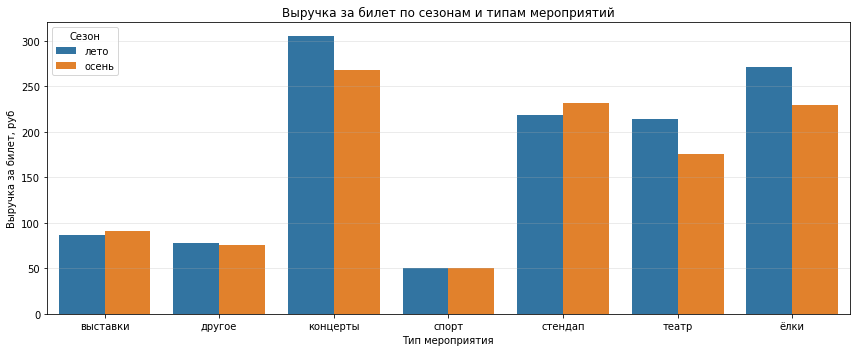

In [62]:
# Визуализируем полученные данные с помощью столбцатой диаграммы
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
sns.barplot(data=group_one_ticket_revenue, 
           x='event_type_main', 
           y='one_ticket_revenue_rub', 
           hue='season',
           palette='tab10')
plt.title('Выручка за билет по сезонам и типам мероприятий')
plt.ylabel('Выручка за билет, руб')
plt.xlabel('Тип мероприятия')
plt.legend(title='Сезон')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

По полученной диаграмме видим, что разница между средней выручкой за билет в разные сезоны невелика, рассчитаем ее.

In [63]:
# Рассчитаем относительное изменение средней выручки за билет
# Создаем pivot таблицу
pivot_df = group_one_ticket_revenue.pivot(index='event_type_main', 
                             columns='season', 
                             values='one_ticket_revenue_rub')
pivot_df['относительная_разница_%'] = ((pivot_df['осень'] - pivot_df['лето']) / pivot_df['лето'] * 100).round(2)

display(pivot_df)

season,лето,осень,относительная_разница_%
event_type_main,,,
выставки,86.42,90.60,4.84
другое,77.44,76.12,-1.70
концерты,304.79,268.36,-11.95
спорт,50.76,49.97,-1.56
стендап,218.52,231.12,5.77
театр,214.14,175.98,-17.82
ёлки,271.44,229.59,-15.42


<Figure size 1008x504 with 0 Axes>

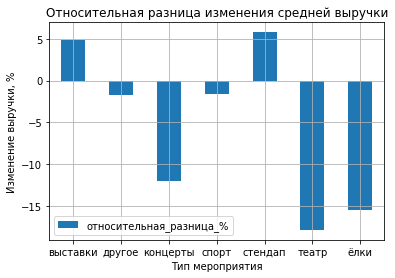

In [64]:
# Визуализируем изменение средней выручки
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 7))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
pivot_df.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               use_index=True,
               y='относительная_разница_%',
               rot=0, # Градус вращения подписи по оси Х
               legend=True, # Выключаем легенду
               title=f'Относительная разница изменения средней выручки'
)

# Настраиваем оформление графика
plt.xlabel('Тип мероприятия')
plt.ylabel('Изменение выручки, %')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По данным в таблице и диаграмме видим, что средняя стоимость билета на `выставку` и `стендап` осенью **на 5% выше**, чем летом, для остальных типов мероприятий средняя стоимость билета осенью **уменьшилась**: меньше всего на `спортивные мероприятия` - **3.83%**, больше всего стоимость уменьшилась на билеты в `театр` - на **17.82%**.

Объединяя эти выводы можно сказать, что тип устройства не зависит от сезонности, а вот тип мероприятия и возрастное ограничение зависит от сезона. Средняя стоимость билета для большинства типов мероприятий уменьшилась осенью на те типы мероприятия, доля заказов которых увеличилась (за исключением концертов).

###  3.2. Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года.

Для начала проанализируем динамику изменений по дням.

In [65]:
# Создадим таблицу, содержащую количество заказов, количество уникальных пользователей и среднюю стоимость билета 
# на каждый осенний день
activ_for_days_df = tickets_df_new[tickets_df_new['season']=='осень'].groupby('created_dt_msk').agg({
    'order_id':'count',
    'user_id':'nunique',
    'one_ticket_revenue_rub':'mean'
}).rename(columns={
    'order_id': 'total_orders',
    'user_id': 'dau',
    'one_ticket_revenue_rub': 'avg_revenue'}).reset_index()

# Добавим столбец, показывающий среднее число заказов на пользователя
activ_for_days_df['avg_orders'] = activ_for_days_df['total_orders'] / activ_for_days_df['dau']    
display(activ_for_days_df)

,created_dt_msk,total_orders,dau,avg_revenue,avg_orders
0,2024-09-01,1327,564,200.168708,2.352837
1,2024-09-02,1380,574,189.464639,2.404181
2,2024-09-03,5113,778,80.350151,6.571979
3,2024-09-04,1773,686,178.048069,2.584548
4,2024-09-05,1944,739,189.510156,2.630582
...,...,...,...,...,...
56,2024-10-27,2849,1034,186.968328,2.755319
57,2024-10-28,2838,985,170.654940,2.881218
58,2024-10-29,2835,998,177.366072,2.840681
59,2024-10-30,2927,1039,182.791483,2.817132


Визуализируем полученные данные.

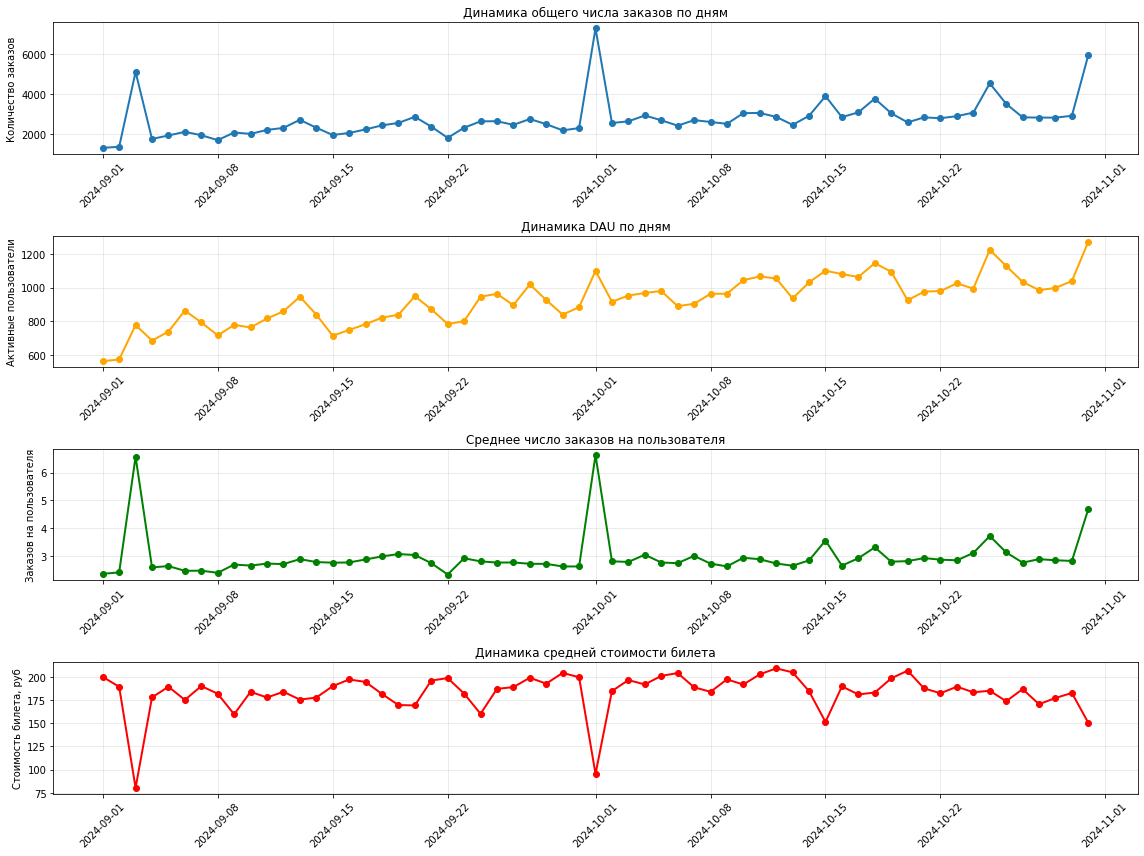

In [66]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(16, 12))

# 1. Общее число заказов
ax1.plot(activ_for_days_df['created_dt_msk'], activ_for_days_df['total_orders'], marker='o', linewidth=2)
ax1.set_title('Динамика общего числа заказов по дням')
ax1.set_ylabel('Количество заказов')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# 2. DAU - количество активных пользователей
ax2.plot(activ_for_days_df['created_dt_msk'], activ_for_days_df['dau'], marker='o', color='orange', linewidth=2)
ax2.set_title('Динамика DAU по дням')
ax2.set_ylabel('Активные пользователи')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(alpha=0.3)

# 3. Среднее число заказов на пользователя
ax3.plot(activ_for_days_df['created_dt_msk'], activ_for_days_df['avg_orders'], marker='o', color='green', linewidth=2)
ax3.set_title('Среднее число заказов на пользователя')
ax3.set_ylabel('Заказов на пользователя')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(alpha=0.3)

# 4. Средняя стоимость билета
ax4.plot(activ_for_days_df['created_dt_msk'], activ_for_days_df['avg_revenue'], marker='o', color='red', linewidth=2)
ax4.set_title('Динамика средней стоимости билета')
ax4.set_ylabel('Стоимость билета, руб')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

По полученным графикам сделать следующие выводы:
 - графики динамики общего числа заказов и среднего числа заказов на пользователя имеют схожий вид - имеются 2 явных максимума: в начале сентября и в начале октября, в целом с течением времени происходит рост общего числа заказов и среднего числа заказов на пользователя;
 - количество активных пользователей имеет положительную динамику и к концу октября увеличилось примерно в 2 раза;
 - динамика средней стоимости билета имеет вид, обратный динамике среднего числа заказов на пользователя - в дни, когда зафиксировано максимальное количество заказов, средняя стоимость билета минимальна, в целом динамика достаточно равномерная и немного снижается к концу октября.
 
 Теперь изучим пользовательскую активность в будни и выходные.

In [67]:
# Добавляем день недели
activ_for_days_df['day_of_week'] = pd.to_datetime(activ_for_days_df['created_dt_msk']).dt.day_name()

# Агрегируем по дням недели
weekly_activ = activ_for_days_df.groupby('day_of_week').agg({
    'total_orders': 'mean',
    'dau': 'mean',
    'avg_orders': 'mean',
    'avg_revenue': 'mean'
}).round(2)

# Правильный порядок дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_activ = weekly_activ.reindex(days_order)
display(weekly_activ)

,total_orders,dau,avg_orders,avg_revenue
day_of_week,,,,
Monday,2390.33,853.67,2.78,184.49
Tuesday,3498.78,934.56,3.72,156.67
Wednesday,2543.44,923.56,2.75,185.49
Thursday,3018.44,962.11,3.06,181.81
Friday,3104.38,1022.62,3.00,185.36
Saturday,2667.62,961.00,2.76,192.50
Sunday,2154.56,822.78,2.60,197.64


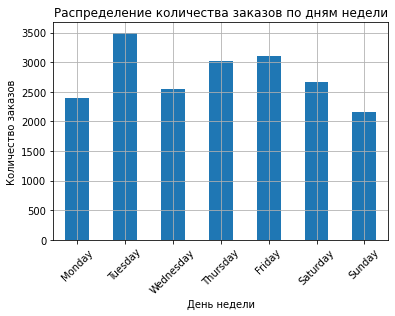

In [68]:
# Построим графики для полученных данных
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
weekly_activ['total_orders'].plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заказов по дням недели',
               colormap='tab10' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()



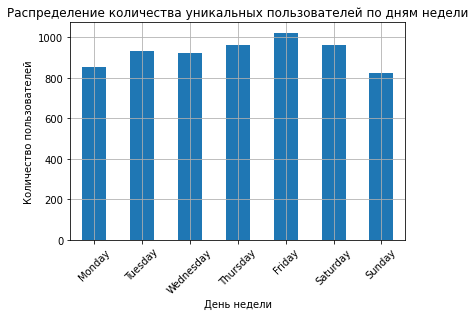

In [69]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
weekly_activ['dau'].plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества уникальных пользователей по дням недели',
               colormap='tab10' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('День недели')
plt.ylabel('Количество пользователей')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

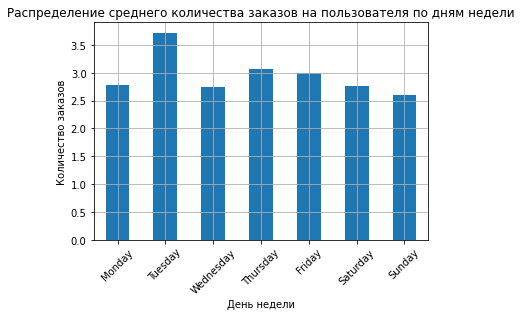

In [70]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
weekly_activ['avg_orders'].plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение среднего количества заказов на пользователя по дням недели',
               colormap='tab10' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

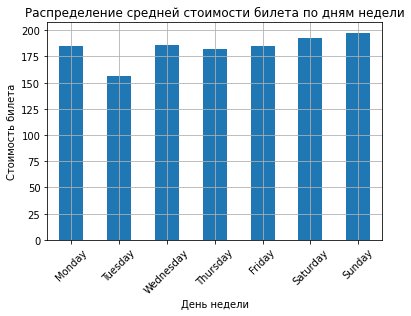

In [71]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
weekly_activ['avg_revenue'].plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение средней стоимости билета по дням недели',
               colormap='tab10' #настраиваем цвет графика
)

# Настраиваем оформление графика
plt.xlabel('День недели')
plt.ylabel('Стоимость билета')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По полученным диаграмма можно сделать следующие выводы:
 - **наибольшее** `количество заказов` происходит по **вторникам, четвергам и пятницам**, а **наименьшее в воскресенье и понедельник**;
 - **наибольшее** `количество уникальных пользователей` наблюдается по **четвергам, пятницам и субботам**;
 - **максимальное** `среднее количество заказов на пользователя` наблюдается **во вторник и составляет 3.72**, а **минимальное - в воскресенье и составляет 2.6**;
 - `средняя стоимость 1 билета` имеет небольшие колебания от **минимальной во втроник (156.67 руб)** до **максимальной в воскресенье (197.64 руб)**.

### 3.3. Популярные события и партнёры

Изучим изменение популярности событий и пользовательской активности осенью 2024 года, и рассмотрим, как события распределены по регионам и партнёрам.

In [72]:
# Создадим таблицу, содержащую количество уникальных мероприятий и количество заказов для каждого региона
region_event = tickets_df_new[tickets_df_new['season']=='осень'].groupby('region_name').agg({
    'event_name':'nunique',
    'order_id':'count'
}).rename(columns={
    'event_name': 'count_event',
    'order_id': 'total_order'}).sort_values(by='count_event', ascending=False).reset_index()

# Считаем общее количество уникальных мероприятий
uniq_event = tickets_df_new[tickets_df_new['season']=='осень']['event_name'].nunique()
# Считаем общее количество заказов
count_orders = tickets_df_new[tickets_df_new['season']=='осень']['order_id'].count()

#Создим столбец, отражающий долю проводимых мероприятий в регионе от общего количества мероприятий
region_event['share_event, %'] = round(100 * region_event['count_event'] / uniq_event, 2)

#Создим столбец, отражающий долю заказов в регионе от общего количества заказов
region_event['share_orders, %'] = round(100 * region_event['total_order'] / count_orders, 2)

display(region_event)

,region_name,count_event,total_order,"share_event, %","share_orders, %"
0,Каменевский регион,3280,46682,29.79,27.68
1,Североярская область,2254,20718,20.47,12.29
2,Светополянский округ,713,4778,6.48,2.83
3,Широковская область,674,8715,6.12,5.17
4,Речиновская область,494,3565,4.49,2.11
...,...,...,...,...,...
74,Кристальная область,4,23,0.04,0.01
75,Яснопольский округ,3,18,0.03,0.01
76,Светолесский край,2,18,0.02,0.01
77,Верхозёрский край,2,11,0.02,0.01


По полученной таблице можно выделить 2 самых популярных региона по количеству проведенных в них мероприятий осенью 2024 года и количеству созданных заказов: 
 - `Каменевский регион` - проведено **3280 мероприятий**, что составляет **29.79%** от общего количества осенних мероприятий, создано **46682 заказов**, что составляет **27.68%** от общего количества осенних заказов;
 - `Североярская область` - проведено **2254 мероприятий**, что составляет **20.47%** от общего количества осенних мероприятий, создано **20718 заказа**, что составляет **12.29%** от обего количества осенних заказов.

Также по расчитанным данным можно сказать, что большая часть регионов проводила **не более 720 мероприятий**, а их доля составляет **не больше 7%**.

Часть регионов провела **менее 5 мероприятий** за осенний период 2024 года, например такие регионы:
 - Кристальная область;
 - Яснопольский округ;
 - Светолесский край;
 - Верхоозерский край;
 - Сосноводолинская область.
 
Теперь изучим популярность билетных партнеров.

In [73]:
# Создадим таблицу, содержащую количество уникальных мероприятий, количество заказов и суммарную выручку 
# для каждого билетного партнера
service_event = tickets_df_new[tickets_df_new['season']=='осень'].groupby('service_name').agg({
    'event_name':'nunique',
    'order_id':'count',
    'revenue_rub':'sum'
}).rename(columns={
    'event_name': 'count_event',
    'order_id': 'total_order',
    'revenue_rub': 'total_revenue'}).sort_values(by='count_event', ascending=False).reset_index()

#Создим столбец, отражающий долю проводимых мероприятий в регионе от общего количества мероприятий
service_event['share_event, %'] = round(100 * service_event['count_event'] / uniq_event, 2)

#Создим столбец, отражающий долю заказов в регионе от общего количества заказов
service_event['share_orders, %'] = round(100 * service_event['total_order'] / count_orders, 2)

display(service_event)

,service_name,count_event,total_order,total_revenue,"share_event, %","share_orders, %"
0,Лови билет!,2870,25794,1.038194e+07,26.07,15.30
1,Билеты без проблем,2190,32404,1.217252e+07,19.89,19.22
2,Билеты в руки,2070,25726,7.612742e+06,18.80,15.26
3,Лучшие билеты,1210,12432,1.676010e+06,10.99,7.37
4,Облачко,1124,15478,1.061105e+07,10.21,9.18
5,Мой билет,818,19416,1.085068e+07,7.43,11.51
6,Тебе билет!,749,3760,2.166179e+06,6.80,2.23
7,Прачечная,635,5798,2.548310e+06,5.77,3.44
8,Весь в билетах,503,9415,9.350394e+06,4.57,5.58
9,Яблоко,453,3473,2.763332e+06,4.11,2.06


По полученной таблице можно выделить **5** билетных сервисов-партнеров, реализовавших билеты более, чем на **1000** мероприятий осенью 2024 года:
 - сервис `Лови билет!` продал билеты на **2870** мероприятий, что составляет **26.07%** от общего количества осенних мероприятий и получил суммарную выручку в размере **10.4 млн руб**;
 - сервис `Билеты без проблем` продал билеты на **2190** мероприятия, что составляет **19.89%** от общего количества осенних мероприятий, и получил суммарную выручку в размере **12.2 млн руб**;
 - сервис `Билеты в руки` продал билеты на **2070** мероприятий, что составляет **18.8%** от общего количества осенних мероприятий, и получил суммарную выручку в размере **7.6** млн руб;
 - сервис `Лучшие билеты` продал билеты на **1210** мероприятий, что составляет **10.99%** от общего количества осенних мероприятий, и получил суммарную выручку вразмере **1.7 млн руб**;
 - сервис `Облачко` продал билеты на **1124** мероприятий, что составляет **10.21%** от общего количества осенних мероприятий, и получил суммарную выручку в размере **10.7 млн руб**.
 
Также по полученным данным можно сказать, что половина сервисов реализовала билеты на **менее 1%** от общего количества мероприятий в течении осени 2024 года (**менее 100 мероприятий**).

### Промежуточные выводы

В ходе исследовательского данных были осуществлены следующие действия:
- изучено влияние сезонности на категории данных: больше всего от сезонности зависит тип мероприятия и возрастное ограничение, также сезонность влияет на среднюю стоимость билета;
- изучена осенняя активность пользователей:
  - в течении осени происходит рост количества заказов и число активных пользователей;
  - наибольшее количество заказов совершалось по `вторникам`, а наибольшее количество пользователей пользовались сервисом по `пятницам`;
- выявлены самые популярные регионы по количеству проведенных мероприятий: `Каменевский регион` и `Североярская область`;
- выделены топ-5 активных билетных сервисов, реализовавших билеты более, чем на 1000 мероприятий: `Лови билет!`, `Билеты без проблем`, `Билеты в руки`, `Лучшие билеты`, `Облачко`.

## 4. Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств в осенний период. 

Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
 - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
 - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
 
Начнем с гипотезы о среднем количестве заказов.

### 4.1 Среднее количество заказов

Суть первой гипотезы состоит в том, что **среднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователя стационарного устройства**.

формулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза **Н0** - среднее количество заказов на одного пользователя для мобильных и стационарных устройств одинаково: 
    **pA = pB**.

- Альтернативная гипотеза **Н1** - cреднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователя стационарного устройства:
    **pA > pB**.
    
Группой **А** будут пользователи с мобильными устройствами, группой **В** будут пользователи со стационарными устройствами.

In [74]:
# Создадим датасет df_test_1 с данными, необходимыми для проверики гипотезы
df_test_1 = tickets_df_new[tickets_df_new['season']=='осень'].groupby('user_id').agg(
    {'order_id':'count', 'device_type_canonical':'first'}).reset_index()
display(df_test_1)

,user_id,order_id,device_type_canonical
0,0005ca5e93f2cf4,1,mobile
1,000898990054619,2,mobile
2,000a55a418c128c,2,mobile
3,001e7037d013f0f,2,mobile
4,00245c702bc343e,2,mobile
...,...,...,...
15806,fff13b79bd47d7c,3,mobile
15807,fff32fc9ad0f9f6,1,desktop
15808,fffcd3dde79eb2c,16,mobile
15809,fffeeb3c120cf0b,1,desktop


In [75]:
#Рассчитаем количество уникальных пользователей в группе А 
count_users_A = df_test_1[df_test_1['device_type_canonical']=='mobile']['user_id'].nunique()
print(count_users_A)

13205


In [76]:
#Рассчитаем количество уникальных пользователей в группе B 
count_users_B = df_test_1[df_test_1['device_type_canonical']=='desktop']['user_id'].nunique()
print(count_users_B)

2606


In [77]:
# Посчитаем, в каком процентном отношении находятся группы
(100 * df_test_1[df_test_1['device_type_canonical']=='mobile']['user_id'].nunique() / df_test_1['user_id'].nunique(),
100 * df_test_1[df_test_1['device_type_canonical']=='desktop']['user_id'].nunique() / df_test_1['user_id'].nunique())

(83.51780406046423, 16.482195939535767)

Видим, что данные неравномерно распределены по группам: **83.5%** пользователей с мобильным приложением против **16.5%** пользователей со стационарными устройствами.

Проверим, есть ли пересечения групп.

In [78]:
#Проверим, есть ли пользователи, встречающиеся одновременно в обеих группах
group_A = df_test_1[df_test_1['device_type_canonical']=='mobile']['user_id']
group_B = df_test_1[df_test_1['device_type_canonical']=='desktop']['user_id']

intersection = set(group_A) & set(group_B)
count = len(intersection)

print(f'Пересекающиеся элементы: {intersection}')  
print(f'Количество пересечений: {count}') 

Пересекающиеся элементы: set()
Количество пересечений: 0


Пересечений в данных нет.

Рассчитаем метрику: среднее количество заказов на одного пользователя.

In [79]:
# Рассчитаем среднее количество заказов на одного пользователя для каждой группы
avg_order = df_test_1.groupby('device_type_canonical').order_id.mean() 
display(avg_order)

device_type_canonical
desktop     9.584421
mobile     10.878379
Name: order_id, dtype: float64

Получили, что среднее количество заказов на 1 пользователя с мобильным приложением больше, чем для пользователей со стационарными устройствами.

С помощью прверки гипотезы, проверим, действительно ли это так.

Так как данные у нас неравномерно распределены по группам ( 83.4% в группе А против 16.6% в группе В), будем использовать **тест Манна-Уитни**, который не зависит от равномерности размера выборок.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза **Н0**: Dist(XA)=Dist(XB) - распределение количества заказов в *группе А (мобильные устройства)* и в *группе В (стационарные устройства)* не различается.
- Альтернативная гипотеза **Н1**: Dist(XA)>Dist(XB) - распределение количества заказов в *группе А (мобильные устройства)* больше, чем в *группе В (стационарные устройства)*.

Гипотезу будем проверять на уровне значимости alpha = 0.05.

In [80]:
# Выборка целевой метрики для группы A
metric_a = df_test_1[df_test_1['device_type_canonical']=='mobile'].order_id 
# Выборка целевой метрики для группы B
metric_b = df_test_1[df_test_1['device_type_canonical']=='desktop'].order_id 

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater' # Альтернативная гипотеза односторонняя
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=0.9281401955892072 > 0.05
Нулевая гипотеза находит подтверждение!


Поскольку p-value = 0.9281401955892072 **выше** уровня значимости, значит, мы попадаем в область принятия нулевой гипотезы. 

На основании полученного значения p-value можем сделать вывод, что распределения метрики в группах A и B **не различаются**. 
Это означает, что среднее количество заказов на пользователя с мобильными и стационарными устройствами **не различается**.

### 4.2 Среднее время между заказами

Суть второй гипотезы состоит в том, что **Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств**.

формулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза **Н0** - среднее время между заказами для пользователей мобильных и стационарных устройств одинаково: 
    **pA = pB**.

- Альтернативная гипотеза **Н1** - среднее время между заказами для пользователей мобильного приложения выше, чем у пользователя стационарного устройства:
    **pA > pB**.
    
Группой **А** также будут пользователи с мобильными устройствами, группой **В** будут пользователи со стационарными устройствами.

In [81]:
# Создадим датасет df_test_2 с данными, необходимыми для проверики гипотезы
#df_test_2 = tickets_df_new[tickets_df_new['season']=='осень'].groupby('user_id').agg(
#    {'order_id':'count', 'device_type_canonical':'first'}).reset_index()

df_test_2 = tickets_df_new[tickets_df_new['season']=='осень'][{'user_id', 'days_since_prev', 'device_type_canonical'}]
display(df_test_2)

,user_id,days_since_prev,device_type_canonical
2,0005ca5e93f2cf4,75.0,mobile
4,000898990054619,83.0,mobile
5,000898990054619,19.0,mobile
7,000a55a418c128c,NaN,mobile
8,000a55a418c128c,16.0,mobile
...,...,...,...
287730,ff3c5654070575e,1.0,desktop
287731,ff3c5654070575e,15.0,desktop
287732,ff3c5654070575e,3.0,mobile
287737,ffc24188a1d58f2,56.0,mobile


In [82]:
df_test_2['days_since_prev'].isna().sum()

8346

В данных содержатся пропуски в столбце `days_since_prev`, которые показывают, что не было предыдущего заказа. Так как они могут повлиять на проведение статистического теста, заменим их на значение '0'.

In [83]:
# Заменим пропуски на индикаторное значение
df_test_2['days_since_prev'] = df_test_2['days_since_prev'].fillna(0)
display(df_test_2)

,user_id,days_since_prev,device_type_canonical
2,0005ca5e93f2cf4,75.0,mobile
4,000898990054619,83.0,mobile
5,000898990054619,19.0,mobile
7,000a55a418c128c,0.0,mobile
8,000a55a418c128c,16.0,mobile
...,...,...,...
287730,ff3c5654070575e,1.0,desktop
287731,ff3c5654070575e,15.0,desktop
287732,ff3c5654070575e,3.0,mobile
287737,ffc24188a1d58f2,56.0,mobile


In [84]:
#Рассчитаем количество уникальных пользователей в группе А 
count_users_A2 = df_test_2[df_test_2['device_type_canonical']=='mobile']['user_id'].nunique()
print(count_users_A2)

14192


In [85]:
#Рассчитаем количество уникальных пользователей в группе А 
count_users_B2 = df_test_2[df_test_2['device_type_canonical']=='desktop']['user_id'].nunique()
print(count_users_B2)

4868


In [86]:
#Проверим, есть ли пользователи, встречающиеся одновременно в обеих группах
group_A2 = df_test_2[df_test_2['device_type_canonical']=='mobile']['user_id']
group_B2 = df_test_2[df_test_2['device_type_canonical']=='desktop']['user_id']

intersection2 = set(group_A2) & set(group_B2)
count2 = len(intersection2)

print(f'Пересекающиеся элементы: {intersection2}')  
print(f'Количество пересечений: {count2}') 

Пересекающиеся элементы: {'93ca3682dfbf7f6', '2e6074a460fff32', '96a25f54d908ee8', 'd194f380a27e5e2', 'b13ad7486136c8d', '50eb77276f29d38', 'bc5316788167e3b', '8b26b596b2299da', 'adc0500e9f5a800', '1021a86d7ee6fb8', '7905e1ad9c5c9a6', '871a53e26a29e43', 'bb1e257bf430031', 'b984607e6b45126', 'd1e72c97b9d86b3', '1661c382a640334', 'c6ae4b598a40999', '1c7336368c8b9a2', 'eb3bcf81738b42b', '565cd8e4773a513', '913e3e352828809', '836758524e31943', '0beb8fc0c0a9ce1', '4648356d1b14ae6', 'd09eb35b2089fa0', 'cdab4b39206973f', 'fe4d4062301a853', 'a67de5f9e037c09', '30df2644f473577', 'c173c804d4e7d7e', 'b91bb2847fa1d1f', '03f5debdd56212b', '134015ef0767506', '96060f1e1575ef3', '2843abbe6127f34', 'fcca25c3a7b4a39', 'a5cb909ca7e5f08', '4a179bd6f563e76', 'b5293cfc33c715a', '08b7f8a3a38362e', '1b06d790a0c7a43', 'e5c01b7f050bee2', '76dfb606b98b55d', 'a63458a4b735f95', 'c765ab78dc1d2e4', '2d96073e7fbc833', '555ab1e99054cb1', '7569bb8b9b34493', 'e35e526ac722993', '85fd87d3e897840', '5260515eb447d16', 'b0d4

Удалим найденные пересекающиеся значения

In [87]:
# Удалим найденные пересечения
df_test_2 = df_test_2[~df_test_2['user_id'].isin(intersection2)]
group_A2 = df_test_2[df_test_2['device_type_canonical']=='mobile']['user_id']
group_B2 = df_test_2[df_test_2['device_type_canonical']=='desktop']['user_id']

intersection2 = set(group_A2) & set(group_B2)
count2 = len(intersection2)

print(f'Пересекающиеся элементы: {intersection2}')  
print(f'Количество пересечений: {count2}') 

Пересекающиеся элементы: set()
Количество пересечений: 0


Пересечения удалены.

Посчитаем процентное соотношение групп. 

In [88]:
# Посчитаем, в каком процентном отношении находятся группы
(100 * df_test_2[df_test_2['device_type_canonical']=='mobile']['user_id'].nunique() / df_test_2['user_id'].nunique(),
100 * df_test_2[df_test_2['device_type_canonical']=='desktop']['user_id'].nunique() / df_test_2['user_id'].nunique())

(87.11192485273045, 12.888075147269543)

Видим, что данные неравномерно распределены по группам: **87.11%** пользователей с мобильным приложением против **12.89%** пользователей со стационарными устройствами.

Теперь расчитаем исследуемую метрику - среднее время между заказами - для каждой группы.

In [89]:
# Рассчитаем среднее время между заказами для каждой группы
avg_time = df_test_2.groupby('device_type_canonical').days_since_prev.mean() 
display(avg_time)

device_type_canonical
desktop    11.762457
mobile     10.840234
Name: days_since_prev, dtype: float64

Получили, что среднее время между заказами для пользователей с мобильным приложением больше, чем для пользователей со стационарными устройствами.

С помощью прверки гипотезы, проверим, действительно ли это так.

Так как данные у нас неравномерно распределены по группам ( 87.07% в группе А против 12.93% в группе В), будем использовать **тест Манна-Уитни**, который не зависит от равномерности размера выборок.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза **Н0**: Dist(XA)=Dist(XB) - распределение времени между заказами в *группе А (мобильные устройства)* и в *группе В (стационарные устройства)* не различается.
- Альтернативная гипотеза **Н1**: Dist(XA)>Dist(XB) - распределение времени между заказами в *группе А (мобильные устройства)* больше, чем в *группе В (стационарные устройства)*.

Гипотезу будем проверять на уровне значимости alpha = 0.05.

In [90]:
# Выборка целевой метрики для группы A
metric_a2 = df_test_2[df_test_2['device_type_canonical']=='mobile'].days_since_prev 
# Выборка целевой метрики для группы B
metric_b2 = df_test_2[df_test_2['device_type_canonical']=='desktop'].days_since_prev 

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a2, 
    metric_b2, 
    alternative='greater' # Альтернативная гипотеза односторонняя
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=6.127027003670033e-39 < 0.05
Нулевая гипотеза не находит подтверждения!


P-value = 6.127027003670033e-39 **меньше** уровня значимости. Это означает, что нет оснований принимать нулевую гипотезу. **Альтернативная гипотеза**, согласно результатам статистического теста, **находит подтверждение**.

Таким образом, можно сделать вывод, что распределение метрики в группе A **больше**, чем в группе B. Это означает, что среднее время между заказами для пользователей с мобильными устройствами **больше**, чем для пользователей со стационарными устройствами.

### Промежуточные выводы

В результате статистического анализа данных были проверены две гипотезы, предполагающие большую активность пользователей мобильных устройств, и получены следующие результаты:
 - гипотеза о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств не подтвердилась;
 - гипотеза о том, что среднее время между заказами для пользователей мобильного приложения больше, чем для пользователей стационарных устройств, нашла подтверждение.

## 5. Общий вывод и рекомендации

### 1. Общий обзор проделанной работы

В ходе исследования были проанализированны данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 31 октября 2024 года. Исследуемая информация включала информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных, информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

Основное внимание в исследовании было уделено изучению динамики пользовательского поведения осенью 2024 года, основной акцент сделан на выявлении изменений в предпочтениях пользователей и популярности событий, а также проверены гипотезы о статистически значимых различиях в поведении пользователей мобильных и стационарных устройств.

### 2. Основные результаты анализа

Проведя анализ предоставленных данных было выявлено наибольшее воздействие сезонности на:
- типы мероприятий - предпочтения пользователей значительно меняются в зависимости от времени года;
- возрастные ограничения - спрос на разные возрастные категории мероприятий имеет выраженную сезонную динамику;
- средняя стоимость билета - ценовая политика варьируется в зависимости от сезона.

Оценка динамики осеннего периода показывает:
- стабильный рост количества заказов и активных пользователей в течение осени;
- пиковые дни активности:
    - **вторник** - максимальное количество заказов;
    - **пятница** - пиковая активность пользователей сервиса;
- положительный тренд - сервис демонстрирует рост популярности в осенний период.

Самые популярные регионы по количеству проведенных мероприятий:
- Каменевский регион - лидер по объему мероприятий - **3280** мероприятий, что составляет **29.79%** от общего количества осенних мероприятий;
- Североярская область - активный регион с высокой культурной активностью - **2254** мероприятий, что составляет **20.47%** от общего количества осенних мероприятий

Выделены топ-5 наиболее успешных билетных сервисов (более 1000 мероприятий):
- Лови билет! - реализовал билеты на **2870** мероприятий - выручка составила **10.4 млн.руб**;
- Билеты без проблем - реализовал билеты на **2190** мероприятия - выручка составила **12.2 млн.руб**;
- Билеты в руки - реализовал билеты на **2070** мероприятий - выручка составила **7.6 млн.руб**;
- Лучшие билеты - реализовал билеты на **1210** мероприятий - выручка составила **1.7 млн.руб**;
- Облачко - реализовал билеты на **1124** мероприятий - выручка составила **10.7 млн.руб**.

Проверены гипотезы о статистически значимых различиях в поведении пользователей мобильных и стационарных устройств:
- гипотеза о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств **не подтвердилась**;
- гипотеза о том, что среднее время между заказами для пользователей мобильного приложения больше, чем для пользователей стационарных устройств, **нашла подтверждение**.

### 3. Рекомендации

На основе проанализированных данных можно дать следующие рекомендации:

- Стратегические решения:
    - сезонное планирование мероприятий с учетом выявленных закономерностей;
    - дифференцированная ценовая политика в зависимости от сезона и типа мероприятий;
    - фокус на вторники и пятницы для максимального охвата аудитории;
    - для стационарных пользователей: программы лояльности и регулярные напоминания;
    - для мобильной аудитория: акции для стимулирования повторных покупок.

- Оптимизация ресурсов:
    - усиление присутствия в Каменевском регионе и Североярской области;
    - партнерство с топовыми билетными сервисами для увеличения продаж;
    - разработка специальных предложений для пиковых дней недели.

- Перспективы роста:
    - расширение географии на основе успешных регионов;
    - разнообразие мероприятий с учетом сезонных предпочтений;
    - улучшение пользовательского опыта в дни высокой активности.